<a href="https://colab.research.google.com/github/jiruneko/supportvector/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [ ]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [ ]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


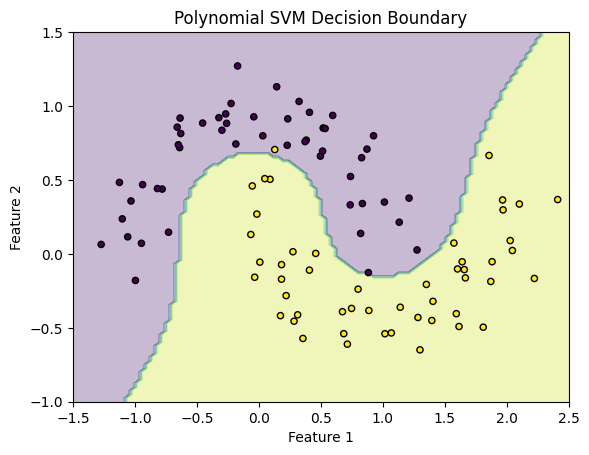

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, random_state=42)
)
polynomial_svm_clf.fit(X, y)

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plot_decision_boundary(polynomial_svm_clf, X, y)
plt.title("Polynomial SVM Decision Boundary")
plt.show()

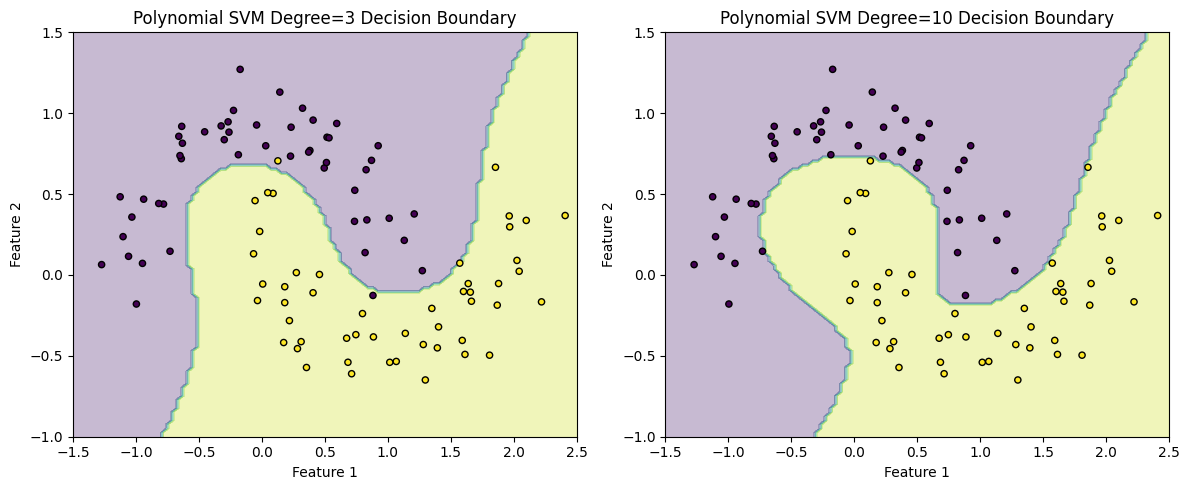

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# データ生成
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Polynomial Kernel SVMの定義とフィット
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# degree=3の場合の図
poly_kernel_svm_clf_degree3 = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf_degree3.fit(X, y)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(poly_kernel_svm_clf_degree3, X, y)
plt.title("Polynomial SVM Degree=3 Decision Boundary")

# degree=10の場合の図
poly_kernel_svm_clf_degree10 = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly_kernel_svm_clf_degree10.fit(X, y)

plt.subplot(1, 2, 2)
plot_decision_boundary(poly_kernel_svm_clf_degree10, X, y)
plt.title("Polynomial SVM Degree=10 Decision Boundary")

plt.tight_layout()
plt.show()


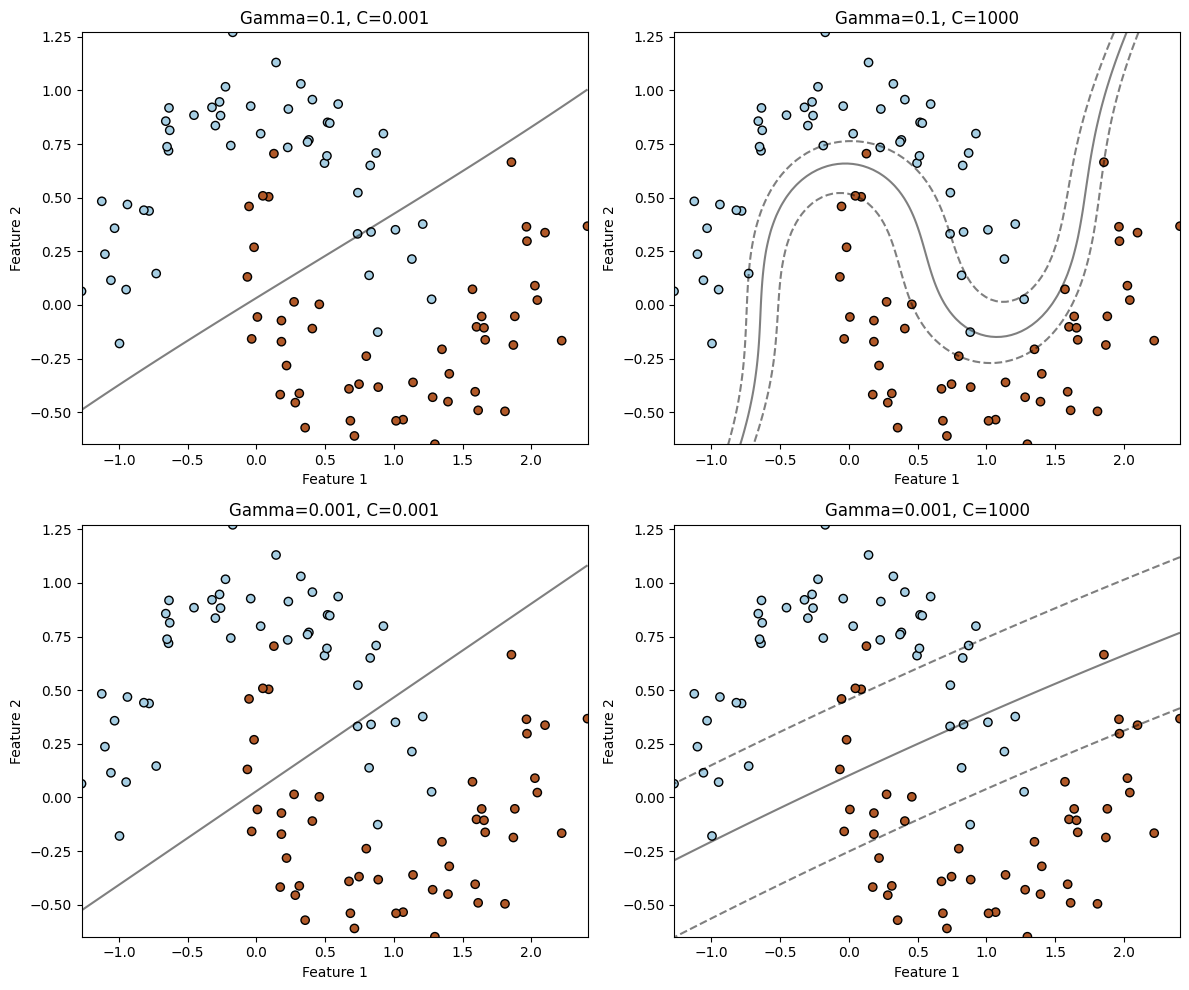

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# データ生成
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# 各パラメータの組み合わせ
gamma_values = [0.1, 0.001]
C_values = [0.001, 1000]

plt.figure(figsize=(12, 10))

# グリッドを作成して各組み合わせに対する決定境界をプロット
for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        rbf_kernel_svm_clf = make_pipeline(
            StandardScaler(),
            SVC(kernel="rbf", gamma=gamma, C=C)
        )
        rbf_kernel_svm_clf.fit(X, y)

        # 決定境界を描画するための準備
        plt.subplot(len(gamma_values), len(C_values), i * len(C_values) + j + 1)
        plt.title(f"Gamma={gamma}, C={C}")

        # データポイントをプロット
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

        # 決定境界を描画
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
        Z = rbf_kernel_svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
